### 화면 가로 확장

In [1]:
# 화면 가로 확장 코드 (기본 width 50%)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### 모듈 임포트

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import tensorflow as tf
import csv
import os
import datetime

### 3년치 데이터 합본 저장, 확인

In [3]:
df_3Y = pd.DataFrame()
for y in range(2013, 2016):
    file = './Combined_Data/'+str(y)+'_'+'House1_Ch1_Combined_Data_Y.csv'
    df_y= pd.read_csv(file, encoding='cp949')
    df_3Y = pd.concat([df_3Y, df_y])
    
df_3Y = df_3Y.drop([df_3Y.columns[0]], axis=1)
df_3Y = df_3Y.reset_index(drop=True)
df_3Y.to_csv("./Combined_Data/House1_Ch1_Combined_Data_13-15.csv", encoding='cp949')

In [4]:
Data_3Y = pd.read_csv('./Combined_Data/House1_Ch1_Combined_Data_13-15.csv', encoding='cp949')
Data_3Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26280 non-null  int64  
 1   DateTime    26280 non-null  int64  
 2   Graph_Date  26280 non-null  object 
 3   Day         26280 non-null  object 
 4   Holiday     26280 non-null  int64  
 5   Seq         26280 non-null  int64  
 6   Watt        26280 non-null  int64  
 7   Temp        26280 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 1.6+ MB


### 4년치 데이터 합본 저장, 확인

In [55]:
df_4Y = pd.DataFrame()
for y in range(2013, 2017):
    file = './Combined_Data/'+str(y)+'_'+'House1_Ch1_Combined_Data_Y.csv'
    df_y= pd.read_csv(file, encoding='cp949')
    df_4Y = pd.concat([df_4Y, df_y])
    
df_4Y = df_4Y.drop([df_4Y.columns[0]], axis=1)
df_4Y = df_4Y.reset_index(drop=True)
df_4Y.to_csv("./Combined_Data/House1_Ch1_Combined_Data_13-16.csv", encoding='cp949')

In [56]:
Data_4Y = pd.read_csv('./Combined_Data/House1_Ch1_Combined_Data_13-16.csv', encoding='cp949')
Data_4Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35040 non-null  int64  
 1   DateTime    35040 non-null  int64  
 2   Graph_Date  35040 non-null  object 
 3   Day         35040 non-null  object 
 4   Holiday     35040 non-null  int64  
 5   Seq         35040 non-null  int64  
 6   Watt        35040 non-null  int64  
 7   Temp        35040 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.1+ MB


### 각 연도별 csv 데이터 로드

In [57]:
Data_2013=pd.read_csv('./Combined_Data/2013_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')
Data_2014=pd.read_csv('./Combined_Data/2014_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')
Data_2015=pd.read_csv('./Combined_Data/2015_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')
Data_2016=pd.read_csv('./Combined_Data/2016_House1_Ch1_Combined_Data_Y.csv', encoding='cp949')

### Plt 그래프 함수

In [50]:
def Graph(name1, name2, year):
    # 1번째 그래프
    ax1 = plt.subplot(2, 1, 1)
    ax1.spines['left'].set_color('yellow')
    ax1.spines['left'].set_lw(2)
    ax1.spines['bottom'].set_color('yellow')
    ax1.spines['bottom'].set_lw(2)

    ax1.tick_params(axis='x', colors='white', size=10)
    ax1.tick_params(axis='x', colors='white', labelsize=15)
    ax1.tick_params(axis='y', colors='white', size=10)
    ax1.tick_params(axis='y', colors='white', labelsize=15)

    plt.plot(x, y1, '.-', color='y', linewidth=1)
    plt.title(name1, fontdict=font_head, pad=20)
    plt.xticks(visible=False)
    plt.ylabel('Watt',labelpad=15, fontdict=font_body)

    # 2번째 그래프
    ax2 = plt.subplot(2, 1, 2, sharex=ax1)
    ax2.spines['left'].set_color('blue')
    ax2.spines['left'].set_lw(2)
    ax2.spines['bottom'].set_color('blue')
    ax2.spines['bottom'].set_lw(2)

    ax2.tick_params(axis='x', colors='white', size=10)
    ax2.tick_params(axis='x', colors='white', labelsize=15)
    ax2.tick_params(axis='y', colors='white', size=10)
    ax2.tick_params(axis='y', colors='white', labelsize=15)

    plt.plot(x, y2, '.-', color='b', linewidth=1)
    plt.title(name2, fontdict=font_head, pad=20)
    plt.xlabel('Time',labelpad=15, fontdict=font_body)
    plt.ylabel('Temp',labelpad=15, fontdict=font_body)
    
    if year==1:
        plt.xticks([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    if year==3:
        plt.xticks([0, 365, 730], labels=['2013', '2014', '2015'])
        
    plt.tight_layout()
    plt.show()

#### 1년치 그래프 확인

#### 2013

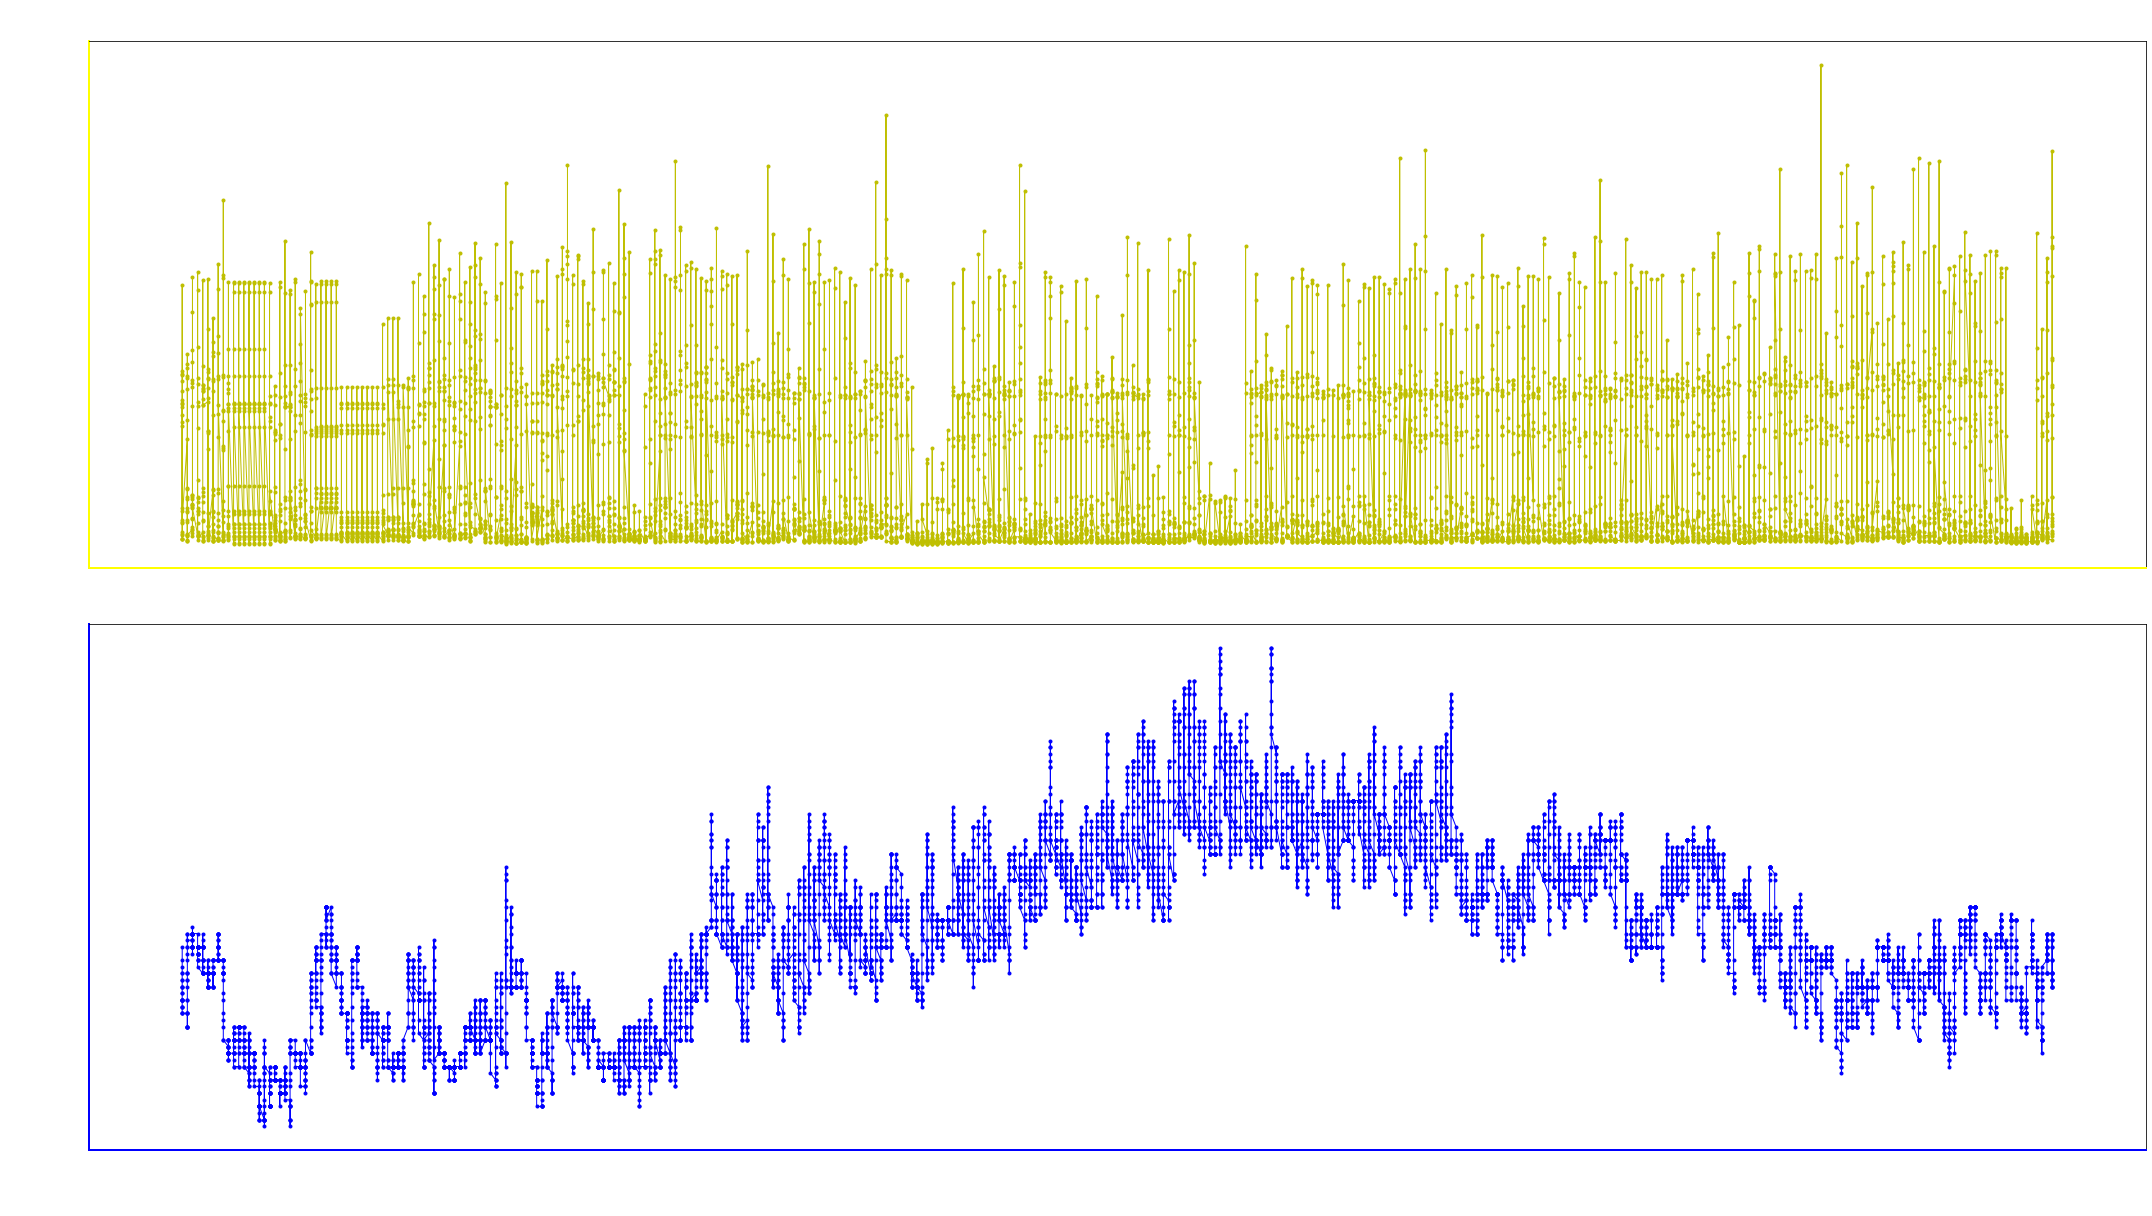

In [51]:
x = Data_2013['Graph_Date']

y1 = Data_2013['Watt']
y2 = Data_2013['Temp']
plt.figure(figsize=(30,17))
font_head = {'color': 'w', 'weight': 'bold', 'size': 20}
font_body = {'color': 'w', 'weight': 'bold', 'size': 15}

Graph("2013's Time-Watt Graph", "2013's Time-Temp Graph", 1)

#### 2014

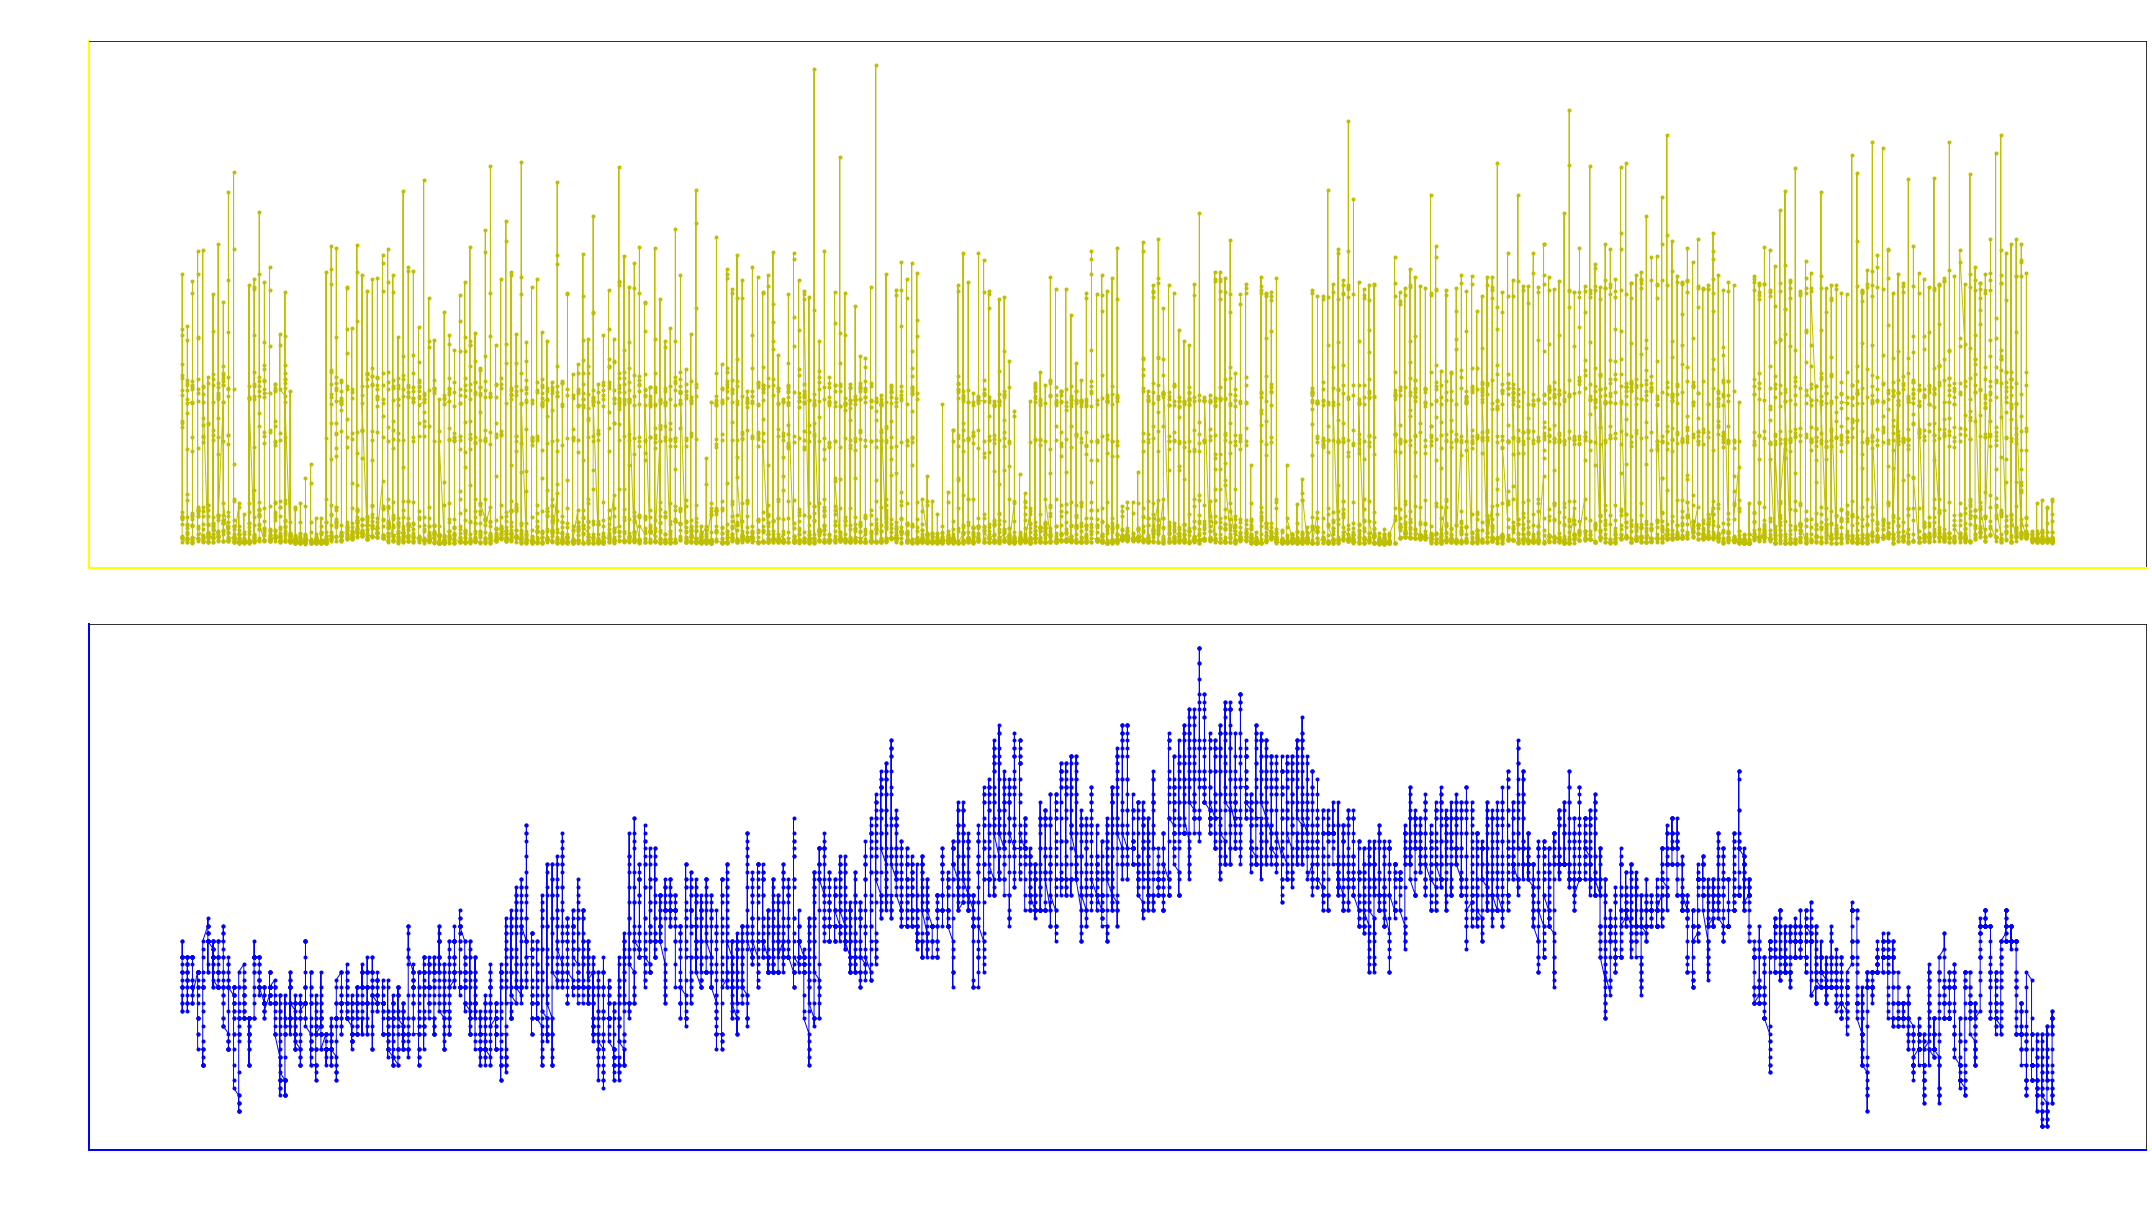

In [52]:
x = Data_2014['Graph_Date']

y1 = Data_2014['Watt']
y2 = Data_2014['Temp']
plt.figure(figsize=(30,17))
font_head = {'color': 'w', 'weight': 'bold', 'size': 20}
font_body = {'color': 'w', 'weight': 'bold', 'size': 15}

Graph("2014's Time-Watt Graph", "2014's Time-Temp Graph", 1)

#### 2015

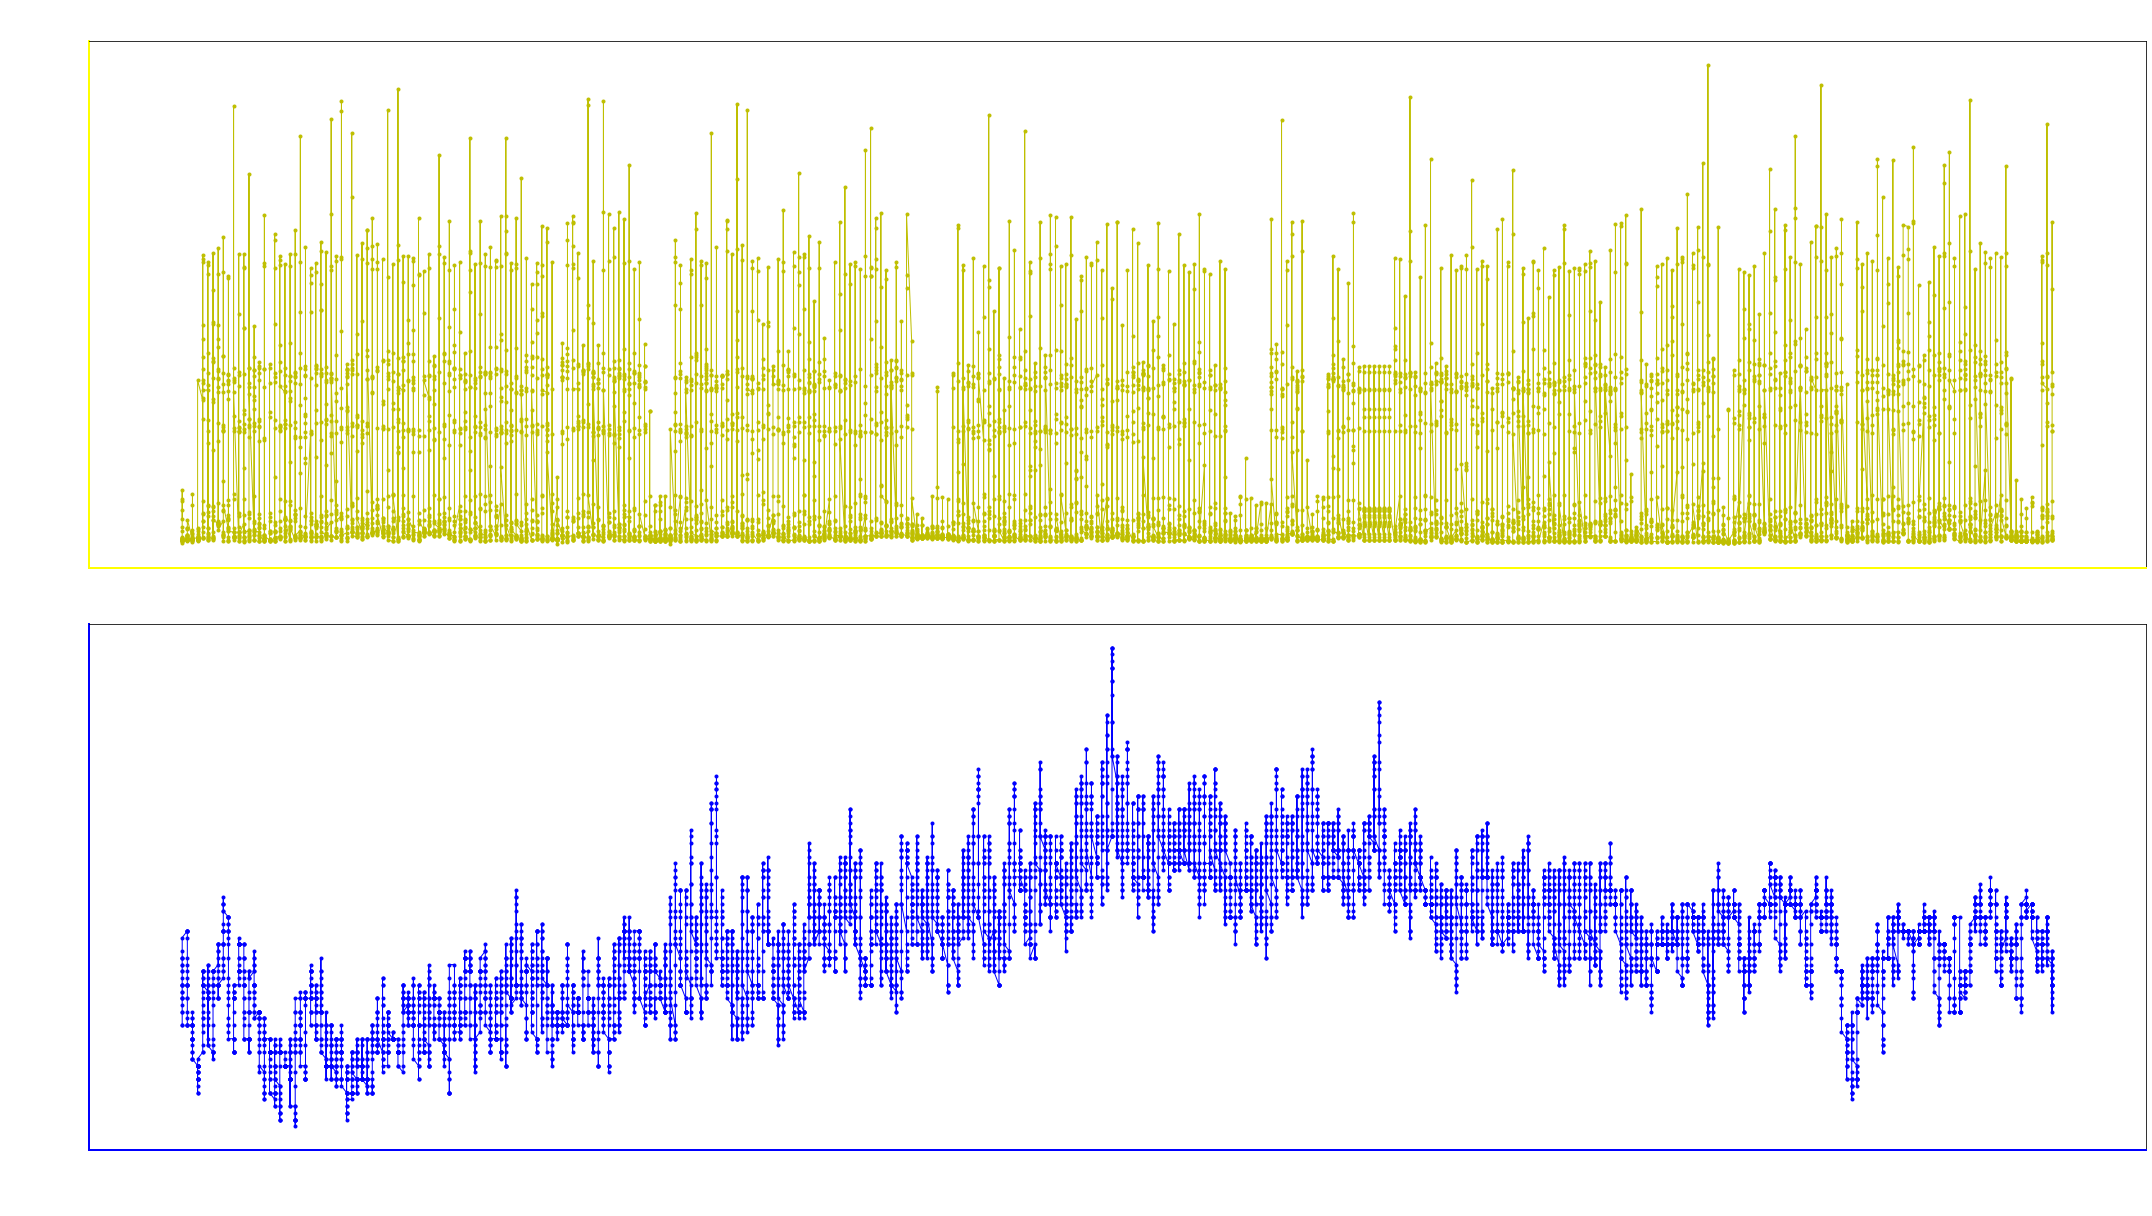

In [53]:
x = Data_2015['Graph_Date']

y1 = Data_2015['Watt']
y2 = Data_2015['Temp']
plt.figure(figsize=(30,17))
font_head = {'color': 'w', 'weight': 'bold', 'size': 20}
font_body = {'color': 'w', 'weight': 'bold', 'size': 15}

Graph("2015's Time-Watt Graph", "2015's Time-Temp Graph", 1)

#### 3년치 데이터 그래프 확인

#### 2013-2015

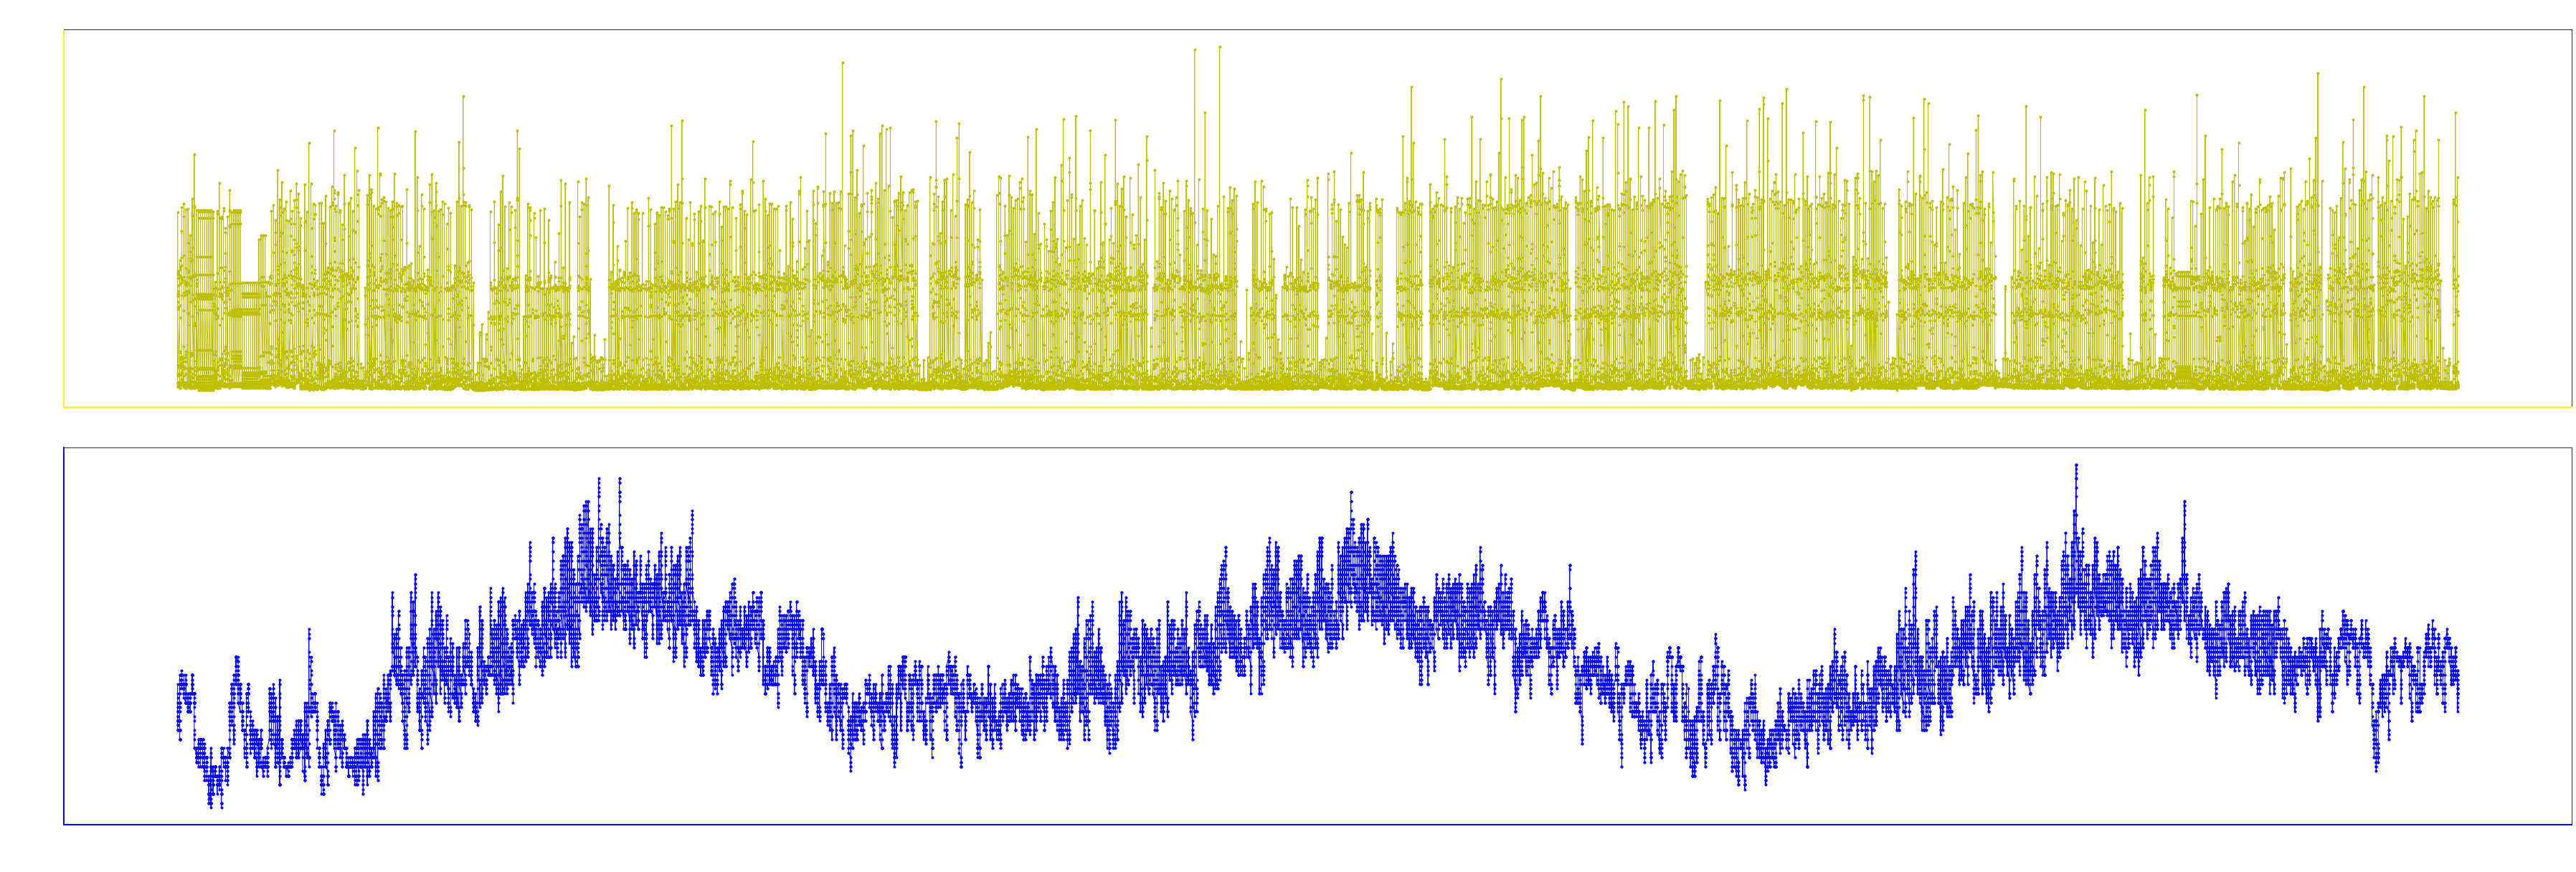

In [18]:
x = Data_3Y['Graph_Date']

y1 = Data_3Y['Watt']
y2 = Data_3Y['Temp']
plt.figure(figsize=(50,17))
font_head = {'color': 'w', 'weight': 'bold', 'size': 20}
font_body = {'color': 'w', 'weight': 'bold', 'size': 15}

Graph("13-15's Time-Watt Graph","13-15's Time-Temp Graph", 3)

### 데이터 정규화

#### Total Data Set 4년치 정규화

#### Min-Max Scaling

In [120]:
from sklearn.preprocessing import MinMaxScaler

# 정규화 과정을 거쳐 데이터 범위를 원하는 범위로 제한. 그래프는 동일하나 손실 정도를 확인하기에 더 좋음.
#배치 정규화는 기울기 소멸 문제를 해결하기는 좋으나, RNN의 경우 계층별로 미니 정규화 적용이 필요해 모델이 복잡해지고 효율이 저하됨.
Data_4Y.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Holiday', 'Watt', 'Temp']
Data_4Y_scaled = scaler.fit_transform(Data_4Y[scale_cols])
Data_4Y_scaled = pd.DataFrame(Data_4Y_scaled)
Data_4Y_scaled.columns = scale_cols

Data_4Y_scaled.insert(0, 'DateTime', Data_4Y['DateTime'])
Data_4Y_scaled.insert(1, 'Graph_Date', Data_4Y['Graph_Date'])
Data_4Y_scaled

,DateTime,Graph_Date,Holiday,Watt,Temp
0,20130101,2013-01-01,1.0,0.270038,0.360000
1,20130101,2013-01-01,1.0,0.268530,0.333333
2,20130101,2013-01-01,1.0,0.263775,0.320000
3,20130101,2013-01-01,1.0,0.011368,0.306667
4,20130101,2013-01-01,1.0,0.010788,0.306667
...,...,...,...,...,...
35035,20161231,2016-12-31,1.0,0.024707,0.333333
35036,20161231,2016-12-31,1.0,0.182809,0.333333
35037,20161231,2016-12-31,1.0,0.089781,0.306667
35038,20161231,2016-12-31,1.0,0.049878,0.306667


### 데이터셋 편집

#### 3Y 데이터 분할, Reshape-2안

In [121]:
TEST_SIZE = 365 # 1년치를 테스트셋으로 사용
WINDOW_SIZE = 7 # 얼마 동안의 과거 기반의 데이터에 기반하여 다음날의 값을 예측할 것인지 설정. 여기서는 일주일 기준. 이 이후로 3개 더 있음.

train = Data_4Y_scaled[:-TEST_SIZE]
test= Data_4Y_scaled[-TEST_SIZE:]

In [122]:
def make_dataset(data, label, window_size=7):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [123]:
from sklearn.model_selection import train_test_split

feature_cols = ['Holiday', 'Watt', 'Temp']
label_cols = ['Watt']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 7)# 여기서도 일자 설정

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.3)

In [124]:
print(' x_train >> {0}\n x_valid >> {1}\n y_train >> {2}\n y_valid >> {3}'.format(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape))

 x_train >> (24267, 7, 3)
 x_valid >> (10401, 7, 3)
 y_train >> (24267, 1)
 y_valid >> (10401, 1)


In [125]:
x_test = test[feature_cols]
y_test = test[label_cols]

In [126]:
x_test, y_test = make_dataset(x_test, y_test, 7)
x_test.shape, y_test.shape

((358, 7, 3), (358, 1))

### 네트워크 2안

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(LSTM(512, input_shape=(train_feature.shape[1], train_feature.shape[2]), activation='ReLU', return_sequences=True))
model.add(Bidirectional(LSTM(256, return_sequences=True), merge_mode='concat'))
model.add(LSTM(256, activation='ReLU', return_sequences = True))
model.add(Bidirectional(LSTM(128, return_sequences=True), merge_mode='concat'))
model.add(LSTM(128, activation='ReLU', return_sequences = True))
model.add(Bidirectional(LSTM(64, return_sequences=True), merge_mode='concat'))
model.add(LSTM(64, activation='ReLU', return_sequences = True))
model.add(Bidirectional(LSTM(32, return_sequences=True), merge_mode='concat'))
model.add(LSTM(32, activation='ReLU', return_sequences = False))
model.add(Dense(1))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_83 (LSTM)               (None, 7, 512)            1056768   
_________________________________________________________________
bidirectional_36 (Bidirectio (None, 7, 512)            1574912   
_________________________________________________________________
lstm_85 (LSTM)               (None, 7, 256)            787456    
_________________________________________________________________
bidirectional_37 (Bidirectio (None, 7, 256)            394240    
_________________________________________________________________
lstm_87 (LSTM)               (None, 7, 128)            197120    
_________________________________________________________________
bidirectional_38 (Bidirectio (None, 7, 128)            98816     
_________________________________________________________________
lstm_89 (LSTM)               (None, 7, 64)           

In [128]:
# 시간 표시, 측정용
now = datetime.datetime.now() # 현재 시각
TimeNow = now.strftime('%Y-%m-%d  %H:%M:%S') # 시작 시각 표시용.

In [135]:
import os
print('Start Time >>', TimeNow, '\n')
now = datetime.datetime.now()
start = now

model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['acc'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history = model.fit(x_train, y_train, epochs=30, batch_size=16,validation_data=(x_valid, y_valid), callbacks=[early_stop, checkpoint])

now = datetime.datetime.now()
end = now
elapsed_time = end-start
elapsed_time = str(elapsed_time).split(".")
elapsed_time = elapsed_time[0]
print('소요시간 >> ', elapsed_time)

Start Time >> 2022-02-11  16:27:39 

Epoch 1/30
1517/1517 [==============================] - 192s 119ms/step - loss: 0.0187 - acc: 0.0000e+00 - val_loss: 0.0194 - val_acc: 9.6145e-05

Epoch 00001: val_loss improved from inf to 0.01936, saving model to model\tmp_checkpoint.h5
Epoch 2/30
1517/1517 [==============================] - 171s 113ms/step - loss: 0.0190 - acc: 0.0000e+00 - val_loss: 0.0196 - val_acc: 9.6145e-05

Epoch 00002: val_loss did not improve from 0.01936
Epoch 3/30
1517/1517 [==============================] - 173s 114ms/step - loss: 0.0190 - acc: 0.0000e+00 - val_loss: 0.0191 - val_acc: 9.6145e-05

Epoch 00003: val_loss improved from 0.01936 to 0.01907, saving model to model\tmp_checkpoint.h5
Epoch 4/30
1517/1517 [==============================] - 171s 112ms/step - loss: 0.0187 - acc: 0.0000e+00 - val_loss: 0.0189 - val_acc: 9.6145e-05

Epoch 00004: val_loss improved from 0.01907 to 0.01890, saving model to model\tmp_checkpoint.h5
Epoch 5/30
1517/1517 [==================

In [136]:
model.load_weights(filename)
pred = model.predict(x_test)

pred.shape

(358, 1)

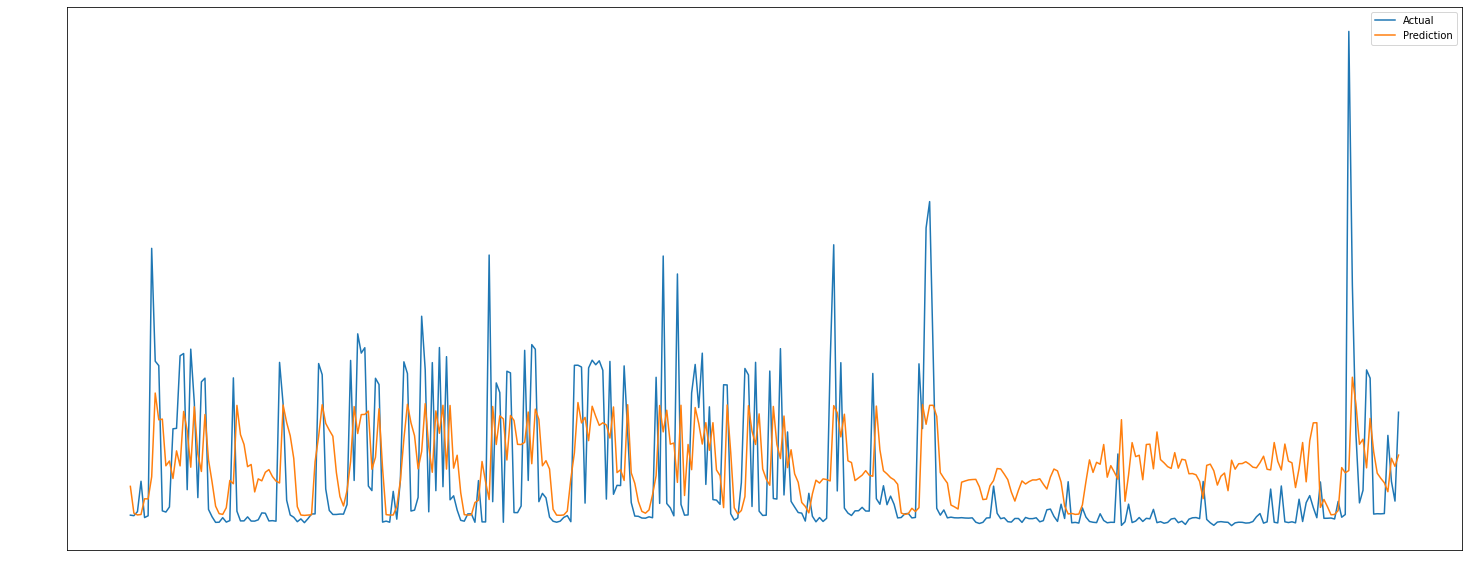

In [137]:
plt.figure(figsize=(25, 10))

plt.tick_params(axis='x', colors='white', size=10)
plt.tick_params(axis='x', colors='white', labelsize=12)
plt.tick_params(axis='y', colors='white', size=10)
plt.tick_params(axis='y', colors='white', labelsize=12)

plt.plot(y_test, label = 'Actual')
plt.plot(pred, label = 'Prediction')
plt.xticks([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0', '2000 W', '3500 W', '5500 W', '7000 W', '8500 W'])
plt.legend()
plt.show()